# **pandas**
** pandas 라이브러리 > 설치해야 함
1. 자료구조 : 시리즈, 데이터프레임

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
type(df)

pandas.core.frame.DataFrame

In [14]:
df.head() # 위의 5건 출력 - defalt, subset(전체 데이터 중 일부만 꺼낸 것)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 1.1 데이터 프레임 이해하기

In [8]:
df.shape # (raw, col), 건 수, 항목 수

(1704, 6)

In [13]:
df.columns # 데이터 인덱스 보기

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [17]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [18]:
# EDA 탐색적 데이터 분석 - shape, columns, dtypes

In [20]:
df.info()
# non-null : 데이터 없는 값이 없음 = 결측치 없음
# Dtype의 object : string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 1.2 데이터 추출하기

### 1.2.1 열 추출

In [22]:
df[ 'country' ] # 데이터 인덱스를 사용해 호출

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [26]:
type(df['country']) # 시리즈 객체

pandas.core.series.Series

In [28]:
df1 = df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [31]:
df['country', 'continent'] # 오류 > 두 개 입력했을 때 튜플로 처리하여 오류

KeyError: ('country', 'continent')

In [33]:
df[ ['country', 'continent'] ] # 여러 인덱스 호출할 시 리스트 형식으로 꺼내야 함

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [36]:
df2 = df[ ['country', 'year', 'lifeExp', 'gdpPercap'] ]
df2.head()

,country,year,lifeExp,gdpPercap
0,Afghanistan,1952,28.801,779.445314
1,Afghanistan,1957,30.332,820.853030
2,Afghanistan,1962,31.997,853.100710
3,Afghanistan,1967,34.020,836.197138
4,Afghanistan,1972,36.088,739.981106


In [39]:
type(df1), type(df2) # df1의 경우 시리즈(한 줄), df2는 데이터프레임(여러 줄)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 1.2.2 행 추출

** 행의 기본 인덱스(행번호) : **iloc**  - iloc(행 번호)  
** 행에 사용자가 부여한 인덱스 : **loc** - loc(행 이름)   
  \> default는 range index

In [40]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [43]:
# 100번째 행 추출
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [48]:
# 마이너스 인덱스 : pandas에서는 마이너스 인덱스 지원X 
#df.loc[-1] > 지원X
df.loc[ df.shape[0] -1 ] # row 수 확인한 값에서 1 빼서 마지막 값 추출

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [49]:
# 여러 행 추출 - [ ] 로 지정
df.loc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [50]:
# loc[], iloc[]의 차이는 컬럼을 꺼내는 방식

df.loc[ [0], [ 'country' ]]

,country
0,Afghanistan


In [51]:
df.iloc[[0], [ 'country' ]] # 오류 > numeric 인덱스 이용하지 않아서

IndexError: .iloc requires numeric indexers, got ['country']

In [52]:
df.iloc[[0], [0]]

,country
0,Afghanistan


In [62]:
# slicing : colon / 전체일 때는 : 표시
df.loc[:10, 'country']

0     Afghanistan
1     Afghanistan
2     Afghanistan
3     Afghanistan
4     Afghanistan
5     Afghanistan
6     Afghanistan
7     Afghanistan
8     Afghanistan
9     Afghanistan
10    Afghanistan
Name: country, dtype: object

In [59]:
df.iloc[ :10, [0]]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


### 1.2.3 range()를 활용한 인덱스 지정

In [70]:
r_list = list(range(1,5,2)) # range에서 step 이용해 짝수번쨰 열 추출
df.iloc[ :, r_list]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [71]:
df.iloc[ : , :6:2]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [74]:
df.iloc[ :11, [-1] ]

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 1.3 기초 통계 게산하기

In [77]:
# descriptive - numeric data

# 전체 데이터의 요약
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [ ]:
# 그룹화


In [80]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [82]:
# 대륙별 인구 pop의 최대값
df.groupby('continent')['pop'].max().sort_index(ascending=False)

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [85]:
# 최대값 기준 정렬
df.groupby('continent')['pop'].max().sort_values(ascending=False)

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [87]:
# 빈도수 계산 : nunique()
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [88]:
# value_counts()

df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64

<Axes: xlabel='year'>

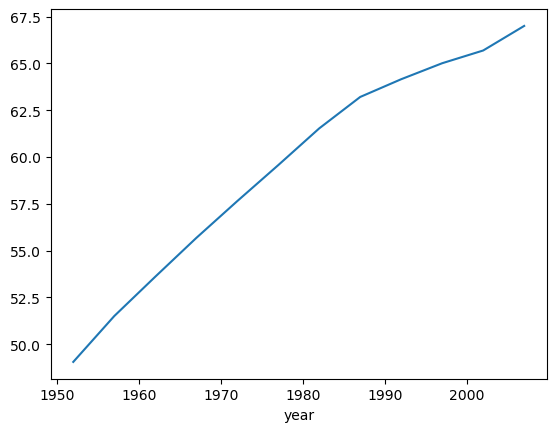

In [89]:
year_lifeExp_mean = df.groupby('year')['lifeExp'].mean()
year_lifeExp_mean.plot()

# 2. 데이터 다루기

## 2.1 시리즈 만들기  

- 1차원 자료 : 리스트 유사, numpy의 array를 기본으로 만들어짐
- 한 열의 데이터는 모두 동일한 타입
- 

In [1]:
import pandas as pd

In [5]:
s = pd.Series(['banana', 10])
# 넣은 데이터 - series의 values, 자동으로 index 생성
# 이용하기 위해선 변수 지정해야 함
type(s) # series 타입

pandas.core.series.Series

In [6]:
s #Range index

0    banana
1        10
dtype: object

In [9]:
# 생성 시 index 지정할 경우 지정한 인덱스명이 함께 담김 
s1 = pd.Series( data = ['홍길동', '김길동'] , index = ['a', 'b']) 
s1 # 딕셔너리와 비슷한 형식

a    홍길동
b    김길동
dtype: object

In [10]:
s1.head()

a    홍길동
b    김길동
dtype: object

In [11]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [12]:
s1.loc['a']

'홍길동'

In [14]:
s1.iloc[0]

'홍길동'

## 2.2 데이터프레임 만들기

In [15]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [16]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [17]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [30]:
# name column를 인덱스로 지정해서 데이터 프레임 생성하기
sc1 = pd.DataFrame(
    data = {"Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61]        
    }, 
    index = ["Rosaline Franklin", "William Gosset"])
sc1

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [25]:
scientists.index = ["Rosaline Franklin", "William Gosset"]
scientists

,Name,Occupation,Born,Died,Age
Rosaline Franklin,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [34]:
# 추출하는 방법
# 1. 대괄호
#f_row = sc1[0]
# 2. loc
#f_row = sc1.loc["Rosaline Franklin"]
# 3. iloc
#f_row = sc1.iloc[0]
f_row

Occupation       Chemist
Born          1920-07-25
Died          1958-04-16
Age                   37
Name: Rosaline Franklin, dtype: object

In [38]:
# 데이터 값 추출
f_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

In [39]:
# 데이터 인덱스 추출
f_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [41]:
sc1['Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [42]:
sc1.loc[:, 'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [48]:
# 시리즈 추출
age = sc1['Age']
age.mean() # 평균, 최대최소값 등 추출 가능

49.0

### 데이터 불러오기

In [53]:
sc2 = pd.read_csv('./data/scientists.csv')

In [60]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [55]:
sc2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [57]:
ages = sc2['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [58]:
ages.describe() # 기술통계량 확인

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [61]:
ages[ ages > ages.mean() ] # 벡터화, 불리언값 테스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [62]:
ages + ages # numpy의 ndarray 개념이므로 연산 가능 > 벡터+벡터(rank1 array)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [64]:
ages + 10 # element wise > broadcasting을 통해 벡터+스칼라 연산 가능

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [65]:
s1 = pd.Series([1,100])
s1

0      1
1    100
dtype: int64

In [69]:
ages + s1 
# rank는 같지만 길이가 다른 벡터의 연산 > 오류나지 않음. 
# numpy의 브로드캐스팅과 차이 : s1의 빈값이 NaN이므로 연산 시 NaN
# 그러므로 반드시 벡터의 길이가 같아야 함

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

## 2.3 인덱스

In [71]:
# defalt는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [79]:
rev_ages = ages.sort_index(ascending=False) # 역순으로 정렬
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [77]:
ages*2 # 역순으로 정렬했으나 연산 시 다시 오름차순으로 정렬됨

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [80]:
ages + rev_ages # index에 맞춰서 sort 후 연산함 > 같은 인덱스 기준으로 자동 정렬 후 연산

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [82]:
first_half = sc2[:4]
second_half = sc2[4:]
first_half

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [86]:
# 데이터프레임에 스칼라 연산
sc2 * 2
# 결과 : 문자열은 반복, 숫자는 *2 실시됨
# column의 type에 따라 연산

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [85]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [89]:
# 숫자로 구성한 데이터프레임의 더하기 연산 +, add()
df1 = df2 = pd.DataFrame(
    data = [[1,2,3], [4,5,6]]
)
df1.add(df2) # 각 값에 벡터 연산 실시

,0,1,2
0,2,4,6
1,8,10,12


## 2.4 열 추가

In [91]:
sc2

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [92]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [95]:
# str > datetime으로 변환 : to_datetime()
# 연도 - 대문자 Y 사용, 01월처럼 0 채우기 위해 % 사용
born_datetime = pd.to_datetime(sc2['Born'], format='%Y-%m-%d') 
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [96]:
# 열 추가
sc2['born_dt'] = born_datetime
sc2.head(3)

,Name,Born,Died,Age,Occupation,born_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12


In [97]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 516.0+ bytes


In [98]:
died_datetime = pd.to_datetime(sc2['Died'], format='%Y-%m-%d')
sc2['died_dt'] = died_datetime

In [99]:
sc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
 6   died_dt     8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 580.0+ bytes


In [135]:
sc2['age_days'] = sc2['died_dt'] - sc2['born_dt']
sc2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [124]:
sc2['age_days'].dtype

dtype('<m8[ns]')

In [134]:
# 날짜를 연도로 바꾸기
# series.apply(함수) > 원하는 연산 한 번에 적용 
import numpy as np
sc2['age_days'] = (sc2['age_days'].dt.days / 365).apply(np.floor) # np.floor : 버림

AttributeError: Can only use .dt accessor with datetimelike values

In [132]:
sc2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [142]:
# df.assign(변수 = 수식) : 수식값을 변수에 할당, col name은 새로 만들어짐
sc2 = sc2.assign(
    age_days_assign = sc2['died_dt'] - sc2['born_dt'], 
    # 기존의 칼럼을 이용해서 계산한 결과를 새로운 칼럼에 할당
    age_assign = (sc2['age_days'].dt.days / 365).apply(np.floor) # 임시 칼럼을 따로 만듦
)
sc2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


## 2.5 열 삭제

In [139]:
sc2.drop( [ 'Age' ], axis='columns' ) # 지정한 변수가 row인지 column인지 작성

,Name,Born,Died,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days


In [140]:
sc2 # drop한 데이터가 그대로 남아있음 > 삭제해야 할 경우 새로운 변수 할당 

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [143]:
sc2_d = sc2.drop( [ 'Age' ], axis='columns' )
sc2_d

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [145]:
# drop() : 재할당 하지 않고 바로 적용하는 방법 - inplace=True
# sc2.drop( [ 'Age' ], axis='columns', inplace=True ) 실시 시 원본에 바로 적용(잘 이용하지 않음)

## 2.6 파일 저장  
- file i/o 이용해서 저장 및 읽기 가능 - pickle로 저장  
- 파이썬의 데이터 파일 형식 : 바이너리 저장/ 읽기  
- 시리즈, 데이터프레임 저장
- csv, tsc, excel 지원
- to_csv(), read_csv()
- excel의 경우 openpyx1을 설치해야 함
- pip install openpyxl

In [149]:
sc2['Name'].to_pickle('./data/scientists_names_series.pickle') # 저장경로/파일이름

In [155]:
# 피클 파일에서 읽어오기 - pandas에서 제공하는 pd.read 이용 시 open()하지 않고 바로 read 가능
series_pk1 = pd.read_pickle('./data/scientists_names_series.pickle')
series_pk1                       

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [156]:
# 참고) 파이썬 내장 모듈
# fp = open()
# load(fp) : read
# dump(fp) : write

In [157]:
# 데이터프레임을 저장, 다시 읽어오기
sc2.to_pickle('./data/scientists_df.pickle')

In [158]:
pd.read_pickle('./data/scientists_df.pickle')

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [160]:
# csv로 저장 및 읽어오기
sc2.to_csv('./data/scientists_df.csv')

In [164]:
sc_scv_df = pd.read_csv('./data/scientists_df.csv')
type(sc_scv_df)

pandas.core.frame.DataFrame

In [166]:
# dictionary로 저장 및 읽어오기
sc_dict = sc2.to_dict()
sc_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Age': {0: 37, 1: 61, 2: 90, 3: 66, 4: 56, 5: 45, 6: 41, 7: 77},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timesta

In [167]:
sc_dict_df = pd.DataFrame.from_dict(sc_dict)
sc_dict_df

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days,77.0


In [170]:
# df > json
sc_json = sc2.to_json(orient='records', indent=2, date_format='iso')
sc_json

'[\n  {\n    "Name":"Rosaline Franklin",\n    "Born":"1920-07-25",\n    "Died":"1958-04-16",\n    "Age":37,\n    "Occupation":"Chemist",\n    "born_dt":"1920-07-25T00:00:00.000",\n    "died_dt":"1958-04-16T00:00:00.000",\n    "age_days":"P13779DT0H0M0S",\n    "age_days_assign":"P13779DT0H0M0S",\n    "age_assign":37.0\n  },\n  {\n    "Name":"William Gosset",\n    "Born":"1876-06-13",\n    "Died":"1937-10-16",\n    "Age":61,\n    "Occupation":"Statistician",\n    "born_dt":"1876-06-13T00:00:00.000",\n    "died_dt":"1937-10-16T00:00:00.000",\n    "age_days":"P22404DT0H0M0S",\n    "age_days_assign":"P22404DT0H0M0S",\n    "age_assign":61.0\n  },\n  {\n    "Name":"Florence Nightingale",\n    "Born":"1820-05-12",\n    "Died":"1910-08-13",\n    "Age":90,\n    "Occupation":"Nurse",\n    "born_dt":"1820-05-12T00:00:00.000",\n    "died_dt":"1910-08-13T00:00:00.000",\n    "age_days":"P32964DT0H0M0S",\n    "age_days_assign":"P32964DT0H0M0S",\n    "age_assign":90.0\n  },\n  {\n    "Name":"Marie Curi

In [172]:
# pprint: 출력 형식을 지정할 수 있음
import pprint
pprint.pprint(sc_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Age":37,\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age_days":"P13779DT0H0M0S",\n'
 '    "age_days_assign":"P13779DT0H0M0S",\n'
 '    "age_assign":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Age":61,\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age_days":"P22404DT0H0M0S",\n'
 '    "age_days_assign":"P22404DT0H0M0S",\n'
 '    "age_assign":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Age":90,\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'


In [176]:
sc_json.to_pickle('./data/sci_json.pickle') # 문자열이라 pickle 불가능
# type(sc_json)

AttributeError: 'str' object has no attribute 'to_pickle'

In [178]:
# json > df
df_json = pd.read_json(sc_json)

C:\Users\Hyeonji Kim\AppData\Local\Temp\ipykernel_13608\1684125383.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_json = pd.read_json(sc_json)


# 3. 데이터 전처리

## 3.1. 깔끔한 데이터  

- 깔끔하지 않은 데이터
1. 열 이름 : 변수가 아니라 변수의 값이 온 경우(1개가 아니라 여러개)

#### 열 이름에 변수의 값이 여러 개 온 경우

In [4]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [9]:
# 분산되어 있는 칼럼을 하나로 합치기 > wide data
# 하나의 칼럼으로 합치기 > 언피봇(피봇 되돌리기), melt
pew_long = pew.melt(id_vars = 'religion', var_name = 'income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [11]:
# wide data > long data로 바꾸기
bbd = pd.read_csv('./data/billboard.csv')
bbd

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
bbd_long = bbd.melt(id_vars = ['year', 'artist', 'track', 'time', 'date.entered'], 
                    var_name = 'weeks', 
                    value_name = 'count'
                   )
bbd_long

,year,artist,track,time,date.entered,weeks,count
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [15]:
# 열 이름에 var, data가 포함된 경우
evola = pd.read_csv('./data/country_timeseries.csv')
evola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [16]:
evola_long = evola.melt(id_vars = ['Date', 'Day'])
evola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [19]:
var_split = evola_long.variable.str.split("_")
type(var_split) # evola_long이 dataframe이므로 series

pandas.core.series.Series

In [22]:
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)
status_values, country_values

(0        Cases
 1        Cases
 2        Cases
 3        Cases
 4        Cases
          ...  
 1947    Deaths
 1948    Deaths
 1949    Deaths
 1950    Deaths
 1951    Deaths
 Name: variable, Length: 1952, dtype: object,
 0       Guinea
 1       Guinea
 2       Guinea
 3       Guinea
 4       Guinea
          ...  
 1947      Mali
 1948      Mali
 1949      Mali
 1950      Mali
 1951      Mali
 Name: variable, Length: 1952, dtype: object)

In [24]:
evola_long['status'] = status_values
evola_long['country'] = country_values

In [25]:
evola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [26]:
evola_long1 = evola.melt(id_vars=['Date', 'Day'])

In [27]:
var_split1 = evola_long1.variable.str.split('_', expand=True)
var_split1

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [28]:
evola_long1[['status', 'country']] = var_split1
evola_long1

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


#### 행에도 중복 데이터가 있을 때 

In [2]:
# 열 이;름에 var, data가 포함되어 있음
import pandas as pd

weather = pd.read_csv('./data/weather.csv')
weather.columns

Index(['id', 'year', 'month', 'element', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16',
       'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26',
       'd27', 'd28', 'd29', 'd30', 'd31'],
      dtype='object')

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       22 non-null     object 
 1   year     22 non-null     int64  
 2   month    22 non-null     int64  
 3   element  22 non-null     object 
 4   d1       2 non-null      float64
 5   d2       4 non-null      float64
 6   d3       4 non-null      float64
 7   d4       2 non-null      float64
 8   d5       8 non-null      float64
 9   d6       2 non-null      float64
 10  d7       2 non-null      float64
 11  d8       2 non-null      float64
 12  d9       0 non-null      float64
 13  d10      2 non-null      float64
 14  d11      2 non-null      float64
 15  d12      0 non-null      float64
 16  d13      2 non-null      float64
 17  d14      4 non-null      float64
 18  d15      2 non-null      float64
 19  d16      2 non-null      float64
 20  d17      2 non-null      float64
 21  d18      0 non-nul

In [5]:
# unpivot(언피봇) 
w_melt = weather.melt(
    id_vars = ['id', 'year', 'month', 'element'],
    var_name = 'day',
    value_name = 'temp'
)
w_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [9]:
# 피봇 pivot element column

w_tidy = w_melt.pivot_table(
    index = ['id', 'year', 'month', 'day'], 
    columns = 'element', 
    values = 'temp'    
)

w_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [10]:
# 결과 데이터프레임의 헤더를 평탄화

w_tidy_flat = w_tidy.reset_index()
w_tidy_flat

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


### 3-2 데이터프레임에 함수 적용하기

In [11]:
df = pd.DataFrame(
    {"a" : [10, 20, 30], 
     "b" : [20, 30, 40]}
)
df

,a,b
0,10,20
1,20,30
2,30,40


In [12]:
# 데이터프레임에 거듭제곱 함수 이용
df['a'] ** 2

0    100
1    400
2    900
Name: a, dtype: int64

#### 사용자 정의 함수(UDF, User Defined Function)를 시리즈, 데이터프레임에 적용

In [13]:
type(df['a'])

pandas.core.series.Series

In [14]:
# 시리즈로 열 선택
df['a']

0    10
1    20
2    30
Name: a, dtype: int64

In [15]:
def my_sq(x): 
    return x**2

In [17]:
# apply 이용해서 시리즈에 함수 적용
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [21]:
# 행에 함수 적용
df.iloc[0]

a    10
b    20
Name: 0, dtype: int64

In [22]:
# 행 선택, 함수 적용
df.iloc[0].apply(my_sq)

a    100
b    400
Name: 0, dtype: int64

In [23]:
# 매개변수 2

def my_exp(x, e): 
    return x**e

In [25]:
df['a'].apply(my_exp) # 매개변수 2개 필요하므로 오류

TypeError: my_exp() missing 1 required positional argument: 'e'

In [26]:
df['a'].apply(my_exp, 2) # 매개변수도 이름으로 받기 때문에 오류

C:\Users\Hyeonji Kim\AppData\Local\Temp\ipykernel_2188\4150834570.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['a'].apply(my_exp, 2)


TypeError: my_exp() missing 1 required positional argument: 'e'

In [27]:
df['a'].apply(my_exp, e=2)

0    100
1    400
2    900
Name: a, dtype: int64

In [29]:
# 데이터프레임 전체에 연산 적용

df

,a,b
0,10,20
1,20,30
2,30,40


In [30]:
df.apply(my_exp, e=3) # axis 기준축 default = 0, axis = 1)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [31]:
df.apply(my_exp, e=3, axis=1)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [32]:
# 벡터화 되지 않는 연산
def print_me(x) : 
    print(x)

In [36]:
df.apply(print_me) # 행기준 연산

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [35]:
df.apply(print_me, axis=1) # 열기준 연산

a    10
b    20
Name: 0, dtype: int64
a    20
b    30
Name: 1, dtype: int64
a    30
b    40
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

#### 매개변수 3개 함수 적용 실습

In [37]:
import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25    5000
1      Bob   45    7000
2  Charlie   35    6500
3    David   32    5500
4      Eva   28    6000


In [50]:
# 나이에 따라 직원을 분류하는 함수 정의

def classify_age(x): 

    for x in df['Age']: 
        x = int(x)
    
        if x < 30: 
            print("young")
        elif (x>=30) and (x<40): 
            print("mid")
        elif x >= 40: 
            print("experienced")

df.apply(classify_age(['Age']))

young
experienced
mid
mid
young


TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [ ]:
# 직원 분류 함수 적용해서 'Category' 칼럼 추가


In [51]:
# 문제풀이 

def age_category(age): 
    if age<30 : 
        return 'Y'
    elif age<40 : 
        return 'M'
    else: 
        return 'E'


In [52]:
df['Age'].apply(age_category)

0    Y
1    E
2    M
3    M
4    Y
Name: Age, dtype: object

In [53]:
# 데이터프레임에 Category 칼럼 추가

df['Category'] = df['Age'].apply(age_category)
df

,Name,Age,Salary,Category
0,Alice,25,5000,Y
1,Bob,45,7000,E
2,Charlie,35,6500,M
3,David,32,5500,M
4,Eva,28,6000,Y


In [56]:
# salary에 보너스 10%를 증가한 컬럼 'Bonus'를 추가 > 람다함수 사용

df['bonus_salary'] = df['Salary'].apply(lambda x: x*1.1)
df

,Name,Age,Salary,Category,bonus_salary
0,Alice,25,5000,Y,5500.0
1,Bob,45,7000,E,7700.0
2,Charlie,35,6500,M,7150.0
3,David,32,5500,M,6050.0
4,Eva,28,6000,Y,6600.0


### 3-3. 데이터 결합하기

In [78]:
# 행 연결하기

In [57]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [61]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
 3   D       4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [62]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
 3   D       4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [63]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
 3   D       4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [72]:
# shape, column-name, index 동일
total_concat = pd.concat( [ df1 , df2 , df3 ] ) #, ignore_index=True 입력 시 인덱스 제외하고 가져옴
total_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [69]:
total_concat.loc[3]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [71]:
total_concat.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,0,a4,b4,c4,d4
5,1,a5,b5,c5,d5
6,2,a6,b6,c6,d6
7,3,a7,b7,c7,d7
8,0,a8,b8,c8,d8
9,1,a9,b9,c9,d9


In [73]:
add_s = pd.Series(['a100', 'b100', 'c100', 'd100'])

type(add_s)

pandas.core.series.Series

In [75]:
new_add_s = pd. concat([total_concat, add_s])
new_add_s # 원하던 모양으로 들어가지 않음 > dataframe으로 들어가야 함

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,a4,b4,c4,d4,NaN
1,a5,b5,c5,d5,NaN
2,a6,b6,c6,d6,NaN
3,a7,b7,c7,d7,NaN
0,a8,b8,c8,d8,NaN
1,a9,b9,c9,d9,NaN


In [77]:
# df로 바꾸어서 넣는다
new_df = pd.DataFrame(
    data = [['a100', 'b100', 'c100', 'd100']], 
    columns = ['A', 'B', 'C', 'D']
)
new_df

,A,B,C,D
0,a100,b100,c100,d100


In [79]:
# 열 연결하기

In [84]:
col_concat = pd.concat([df1, df2, df3], axis="columns")

In [85]:
# 열 이름으로 A컬럼 추출

In [86]:
# 리스트를 이용해 새로운 열로 추가
col_concat['new_col'] = ['n1', 'n2', 'n3', 'n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [88]:
col_concat = pd.concat([df1, df2, df3], axis="columns", ignore_index=True)
col_concat

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [89]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [90]:
row_concat = pd.concat([df1, df2, df3])

In [91]:
row_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [93]:
row_concat = pd.concat([df1, df2, df3], join='inner') # inner = 공통인 것만 가져옴, outer = 모두 가져옴
row_concat

""
0
1
2
3
0
1
2
3
0
1


In [101]:
# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})

In [105]:
pd.concat([january, february], axis=0) # row 연결

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250
0,2023-02-01,300
1,2023-02-02,350


In [107]:
# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})

In [112]:
pd.concat([store_a.set_index('Date'), store_b.set_index('Date')], axis=1)

,Sales_A,Sales_B
Date,,
2023-01-01,200,300
2023-01-02,250,350


In [113]:
# 상점 C의 매출 데이터
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

# 상점 D의 매출 데이터
store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})

In [118]:
pd.concat([store_c.set_index('Date'), store_d.set_index('Date')], axis=1)

,Sales_C,Sales_D
Date,,
2023-01-01,220.0,NaN
2023-01-03,280.0,370.0
2023-01-02,NaN,330.0


##### p.228~235 분할된 데이터 연결하기 실습

In [126]:
from pathlib import Path

billboard_data_files = (
    Path(".")
    .glob("./data/billboard-by_week/billboard-*.csv")
)

billboard_data_files = sorted(list(billboard_data_files))
print(billboard_data_files)

[WindowsPath('data/billboard-by_week/billboard-01.csv'), WindowsPath('data/billboard-by_week/billboard-02.csv'), WindowsPath('data/billboard-by_week/billboard-03.csv'), WindowsPath('data/billboard-by_week/billboard-04.csv'), WindowsPath('data/billboard-by_week/billboard-05.csv'), WindowsPath('data/billboard-by_week/billboard-06.csv'), WindowsPath('data/billboard-by_week/billboard-07.csv'), WindowsPath('data/billboard-by_week/billboard-08.csv'), WindowsPath('data/billboard-by_week/billboard-09.csv'), WindowsPath('data/billboard-by_week/billboard-10.csv'), WindowsPath('data/billboard-by_week/billboard-11.csv'), WindowsPath('data/billboard-by_week/billboard-12.csv'), WindowsPath('data/billboard-by_week/billboard-13.csv'), WindowsPath('data/billboard-by_week/billboard-14.csv'), WindowsPath('data/billboard-by_week/billboard-15.csv'), WindowsPath('data/billboard-by_week/billboard-16.csv'), WindowsPath('data/billboard-by_week/billboard-17.csv'), WindowsPath('data/billboard-by_week/billboard-1

In [127]:
billboard_data_files = list(billboard_data_files)

[WindowsPath('data/billboard-by_week/billboard-01.csv'),
 WindowsPath('data/billboard-by_week/billboard-02.csv'),
 WindowsPath('data/billboard-by_week/billboard-03.csv'),
 WindowsPath('data/billboard-by_week/billboard-04.csv'),
 WindowsPath('data/billboard-by_week/billboard-05.csv'),
 WindowsPath('data/billboard-by_week/billboard-06.csv'),
 WindowsPath('data/billboard-by_week/billboard-07.csv'),
 WindowsPath('data/billboard-by_week/billboard-08.csv'),
 WindowsPath('data/billboard-by_week/billboard-09.csv'),
 WindowsPath('data/billboard-by_week/billboard-10.csv'),
 WindowsPath('data/billboard-by_week/billboard-11.csv'),
 WindowsPath('data/billboard-by_week/billboard-12.csv'),
 WindowsPath('data/billboard-by_week/billboard-13.csv'),
 WindowsPath('data/billboard-by_week/billboard-14.csv'),
 WindowsPath('data/billboard-by_week/billboard-15.csv'),
 WindowsPath('data/billboard-by_week/billboard-16.csv'),
 WindowsPath('data/billboard-by_week/billboard-17.csv'),
 WindowsPath('data/billboard-by

In [131]:
# 데이터프레임 생성
bill1 = pd.read_csv(billboard_data_files[0])
bill2 = pd.read_csv(billboard_data_files[1])
bill3 = pd.read_csv(billboard_data_files[2])

In [133]:
bill1.info()
bill1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   week          317 non-null    object 
 6   rating        317 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 17.5+ KB


,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


In [135]:
# 데이터 건수 확인
bill1.shape, bill2.shape, bill3.shape

((317, 7), (317, 7), (317, 7))

In [136]:
# 데이터 병합
bill123 = pd.concat([bill1, bill2, bill3])
bill123

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk3,77.0
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk3,83.0
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk3,91.0
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk3,NaN


In [139]:
# 정합성 체크
assert(
    bill1.shape[0]
    + bill2.shape[0]
    + bill3.shape[0]
    == bill123.shape[0]
)
# 오류가 있을 경우 assert 오류 발생, 없다면 아무 액션 없음

In [140]:
# 자동화 > 리스트 컴프리헨션 이용

billboard_data_files_auto = [ pd.read_csv(data) for data in billboard_data_files]

In [141]:
len(billboard_data_files_auto)

76

In [142]:
final_billboard = pd.concat(billboard_data_files_auto)
final_billboard.shape

(24092, 7)

##### 병합하기(join)

In [143]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [144]:
# 매출
sales_data.head()

,CustomerID,Date,Amount
0,101,2023-01-01,250
1,102,2023-01-03,300
2,103,2023-01-05,150
3,104,2023-01-07,400


In [145]:
# 고객
customer_data.head()

,CustomerID,Name,Region
0,101,Alice,North
1,102,Bob,South
2,103,Charlie,East
3,105,Eva,West


In [147]:
pd.merge(sales_data, customer_data, on='CustomerID') 
# join의 default = inner, on=키, 공통의 키가 존재하는 경우 병합

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [148]:
pd.merge(sales_data, customer_data, on='CustomerID', how='outer')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [149]:
pd.merge(sales_data, customer_data, on='CustomerID', how='left')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East
3,104,2023-01-07,400,NaN,NaN


In [150]:
pd.merge(sales_data, customer_data, on='CustomerID', how='right')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,105,NaN,NaN,Eva,West


##### p.245 데이터 테이블 정규화

In [151]:
billboard = pd.read_csv('./data/billboard.csv')
billboard_long = billboard.melt(
    id_vars = ["year", "artist", "track", "time", "date.entered"], 
    var_name = "week", 
    value_name = "rating"
)
print(billboard_long)

       year            artist                    track  time date.entered  \
0      2000             2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000           2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   
2      2000      3 Doors Down               Kryptonite  3:53   2000-04-08   
3      2000      3 Doors Down                    Loser  4:24   2000-10-21   
4      2000          504 Boyz            Wobble Wobble  3:35   2000-04-15   
...     ...               ...                      ...   ...          ...   
24087  2000       Yankee Grey     Another Nine Minutes  3:10   2000-04-29   
24088  2000  Yearwood, Trisha          Real Live Woman  3:55   2000-04-01   
24089  2000   Ying Yang Twins  Whistle While You Tw...  4:19   2000-03-18   
24090  2000     Zombie Nation            Kernkraft 400  3:30   2000-09-02   
24091  2000   matchbox twenty                     Bent  4:12   2000-04-29   

       week  rating  
0       wk1    87.0  
1       wk1    91.0  
2       w

In [152]:
print(billboard_long.loc[billboard_long.track == 'Loser'])

       year        artist  track  time date.entered  week  rating
3      2000  3 Doors Down  Loser  4:24   2000-10-21   wk1    76.0
320    2000  3 Doors Down  Loser  4:24   2000-10-21   wk2    76.0
637    2000  3 Doors Down  Loser  4:24   2000-10-21   wk3    72.0
954    2000  3 Doors Down  Loser  4:24   2000-10-21   wk4    69.0
1271   2000  3 Doors Down  Loser  4:24   2000-10-21   wk5    67.0
...     ...           ...    ...   ...          ...   ...     ...
22510  2000  3 Doors Down  Loser  4:24   2000-10-21  wk72     NaN
22827  2000  3 Doors Down  Loser  4:24   2000-10-21  wk73     NaN
23144  2000  3 Doors Down  Loser  4:24   2000-10-21  wk74     NaN
23461  2000  3 Doors Down  Loser  4:24   2000-10-21  wk75     NaN
23778  2000  3 Doors Down  Loser  4:24   2000-10-21  wk76     NaN

[76 rows x 7 columns]


In [153]:
billboard_songs = billboard_long[
    ["year", "artist", "track", "time", "date.entered"]
]
print(billboard_songs.shape)

(24092, 5)


In [155]:
billboard_songs = billboard_songs.drop_duplicates()
print(billboard_songs.shape)

(317, 5)


In [156]:
billboard_songs['id'] = billboard_songs.index + 1
print(billboard_songs)

     year            artist                    track  time date.entered   id
0    2000             2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26    1
1    2000           2Ge+her  The Hardest Part Of ...  3:15   2000-09-02    2
2    2000      3 Doors Down               Kryptonite  3:53   2000-04-08    3
3    2000      3 Doors Down                    Loser  4:24   2000-10-21    4
4    2000          504 Boyz            Wobble Wobble  3:35   2000-04-15    5
..    ...               ...                      ...   ...          ...  ...
312  2000       Yankee Grey     Another Nine Minutes  3:10   2000-04-29  313
313  2000  Yearwood, Trisha          Real Live Woman  3:55   2000-04-01  314
314  2000   Ying Yang Twins  Whistle While You Tw...  4:19   2000-03-18  315
315  2000     Zombie Nation            Kernkraft 400  3:30   2000-09-02  316
316  2000   matchbox twenty                     Bent  4:12   2000-04-29  317

[317 rows x 6 columns]


In [157]:
billboard_ratings = billboard_long.merge(
    billboard_songs, on=["year", "artist", "track", "time", "date.entered"]
)
print(billboard_ratings.shape)

(24092, 8)


In [159]:
billboard_ratings = billboard_ratings[
["id", "week", "rating"]
]
print(billboard_ratings)

        id  week  rating
0        1   wk1    87.0
1        2   wk1    91.0
2        3   wk1    81.0
3        4   wk1    76.0
4        5   wk1    57.0
...    ...   ...     ...
24087  313  wk76     NaN
24088  314  wk76     NaN
24089  315  wk76     NaN
24090  316  wk76     NaN
24091  317  wk76     NaN

[24092 rows x 3 columns]


### 3-4. 그룹연산하기  
- 데이터 집계 목적

##### 데이터 집계 groupby(), category

In [161]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [162]:
df.shape[0]

1704

In [166]:
df.describe() # numeric

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [167]:
df.groupby('country')

In [169]:
df.groupby('country').lifeExp.mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

##### 데이터 변환(transform)

In [171]:
df.groupby('continent').lifeExp.mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [172]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [175]:
df.groupby(['continent', 'year']).lifeExp.mean() # dataframe의 칼럼 > 바로 mean 사용 가능

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

#### groupby에서 적용하는 집계함수

(노션 내 이미지파일 참고)

In [182]:
import numpy as np
df.groupby('continent').lifeExp.agg("mean", "std", "min", "max")

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [185]:
df.groupby('continent').agg(
    {
        "lifeExp" : "mean",
        "pop" : "median",
        "gdpPercap" : "max"

    }

)

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,21951.21176
Americas,64.658737,6227510.0,42951.65309
Asia,60.064903,14530830.5,113523.13290
Europe,71.903686,8551125.0,49357.19017
Oceania,74.326208,6403491.5,34435.36744


In [188]:
# agg(udf) 

In [191]:
# 표준점수, 나의 값이 전체 데이터 평균과 비교해서 얼마나 떨어져있는지 보여주는 함수
def my_zscore(x): 
    return ((x - x.mean()) / x.std())

In [192]:
df.groupby('continent').lifeExp.transform(my_zscore)

0      -2.635073
1      -2.506033
2      -2.365698
3      -2.195190
4      -2.020889
          ...   
1699    1.473810
1700    1.258077
1701   -0.224730
1702   -0.970068
1703   -0.587782
Name: lifeExp, Length: 1704, dtype: float64

In [193]:
# 개수 세는 함수 : count()
df.groupby('continent').count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


In [196]:
df.groupby('continent').filter(lambda x:x['continent'].count()>600)

,country,continent,year,lifeExp,pop,gdpPercap
24,Algeria,Africa,1952,43.077,9279525,2449.008185
25,Algeria,Africa,1957,45.685,10270856,3013.976023
26,Algeria,Africa,1962,48.303,11000948,2550.816880
27,Algeria,Africa,1967,51.407,12760499,3246.991771
28,Algeria,Africa,1972,54.518,14760787,4182.663766
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### 3.5 결측치 처리

NaN, NAN, nan

In [2]:
from numpy import NAN, NaN, nan
# nan는 float 형식의 데이터 -> bool 연산 불가능

In [199]:
import pandas as np
pd.isnull(NaN)

True

In [201]:
pd.notnull(NaN)

False

#### 결측값이 생기는 이유

##### 1. 데이터를 불러올 때 생기는 결측치

- 판다스가 데이터를 불러올 때 값이 없으면 NaN으로 대체
- na_values, keep_default_na, na_filter 속성 활용

In [4]:
import pandas as pd
file_dir = './data/survey_visited.csv'
pd.read_csv(file_dir)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [6]:
pd.read_csv(file_dir, keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


##### 2. 데이터를 연결할 때

- concat()  
- merge()  
  => 두 가지 모두 join을 하는 함수 > 열이 다르거나 index가 다를 때 nan 발생 가능 

In [11]:
file_dir1 = './data/survey_visited.csv'
file_dir2 = './data/survey_survey.csv'
visited_df = pd.read_csv(file_dir1)
survey_df = pd.read_csv(file_dir2)

In [12]:
survey_df.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [13]:
visited_df.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [15]:
new_df = visited_df.merge(survey_df, left_on='ident', right_on='taken')
new_df

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


#### 3. reset_index() 할 때

In [17]:
file_dir3 = './data/gapminder.tsv'
gap_df = pd.read_csv(file_dir3, sep='\t')
gap_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [18]:
new_df = gap_df.groupby(['year'])['lifeExp'].mean()
new_df

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [22]:
y2000 = new_df[new_df.index > 2000]
y2000.reindex(range(2000,2010), fill_value=0)

year
2000     0.000000
2001     0.000000
2002    65.694923
2003     0.000000
2004     0.000000
2005     0.000000
2006     0.000000
2007    67.007423
2008     0.000000
2009     0.000000
Name: lifeExp, dtype: float64

#### 결측치의 처리

In [27]:
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola.shape

(122, 18)

In [25]:
print(ebola.count()) # 누락값을 제외한 값의 갯수를 셈

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64


In [28]:
# 열별 누락값 계산
total_r = ebola.shape[0]
num_missing = total_r - ebola.count()
num_missing

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [31]:
# 전체 누락값
import numpy as np

np.count_nonzero(ebola.isnull())

1214

In [32]:
ebola.Cases_Guinea.value_counts(dropna=False)

Cases_Guinea
NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
1199.0     1
1298.0     1
1350.0     1
1472.0     1
49.0       1
Name: count, Length: 89, dtype: int64

In [33]:
ebola.fillna(0).head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


In [34]:
ebola.fillna(method='ffill')

C:\Users\Hyeonji Kim\AppData\Local\Temp\ipykernel_12172\3813165378.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method='ffill')


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [40]:
ebola.interpolate()

C:\Users\Hyeonji Kim\AppData\Local\Temp\ipykernel_12172\4098302585.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ebola.interpolate()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [42]:
new_ebola = ebola.dropna()
new_ebola.shape

(1, 18)

In [43]:
# 결측치를 포함한 계산
ebola['cases_multiple'] = (
    ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']
)

In [44]:
ebola.head(3)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,cases_multiple
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,20657.0


In [46]:
ebola.Cases_Guinea.sum( skipna=True ) # 결측치를 무시하고 계산

84729.0

In [47]:
ebola.Cases_Guinea.sum( skipna=False) # default, 결측치 포함해서 계산

nan